In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df_screen = pd.read_csv('../data/screen_time.csv')
df_screen.head()

In [ ]:
rows, cols = df_screen.shape
print(f'El dataset tiene {rows} filas y {cols} columnas.')

In [ ]:
df_screen.info()

In [ ]:
df_screen.describe()

In [ ]:
df_screen.isnull().sum()

In [ ]:
df_screen["Screen Time Type"].value_counts()

In [ ]:
num_cols = df_screen.select_dtypes(include=['int64', 'float64']).columns
df_screen[num_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

In [ ]:
cat_cols = df_screen.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_screen, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_screen, x='Day Type', y='Average Screen Time (hours)')
plt.title('Distribución del Tiempo de Pantalla por Tipo de Día')
plt.xlabel('Tipo de Día')
plt.ylabel('Tiempo de Pantalla (horas)')
plt.show()

IED - INDICE DE EQUILIBRIO DIGITAL
(El IED mide si el uso de pantallas:
está equilibrado,
tiene propósito(educativo),
no domina el tiempo del niño.)

Interpretación del IED

IED alto → uso equilibrado y con propósito

IED bajo → sobreexposición o uso no regulado



In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df_screen_copy = df_screen.copy()

df_screen_copy["Age_Group"] = df_screen_copy["Age"].apply(
    lambda x: "Child" if x < 12 else "Adolescent"
)

df_grouped = (
    df_screen_copy
    .groupby(["Age_Group", "Screen Time Type"])["Average Screen Time (hours)"]
    .mean()
    .reset_index()
)

df_pivot = df_grouped.pivot(
    index="Age_Group",
    columns="Screen Time Type",
    values="Average Screen Time (hours)"
).reset_index()

df_pivot.columns.name = None

scaler = MinMaxScaler()
screen_cols = ["Educational", "Recreational", "Total"]
df_pivot[screen_cols] = scaler.fit_transform(df_pivot[screen_cols])

In [ ]:
# Calcular el Índice de Equilibrio Digital (IED)

df_pivot["IED"] = (
    0.45 * df_pivot["Educational"] +
    0.35 * (1 - df_pivot["Total"]) +
    0.20 * (1 - df_pivot["Recreational"])
)


In [ ]:
#exportar el ied para usarlo en el otro notebook


df_ied = df_pivot[["Age_Group", "IED"]]

df_ied.to_csv("../data/ied_by_age_group.csv", index=False)
df_ied

/var/folders/m6/9v0_yl357zx85v4fgqtpsfj00000gn/T/ipykernel_957/3922715746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ied, x='Age_Group', y='IED', palette='viridis')


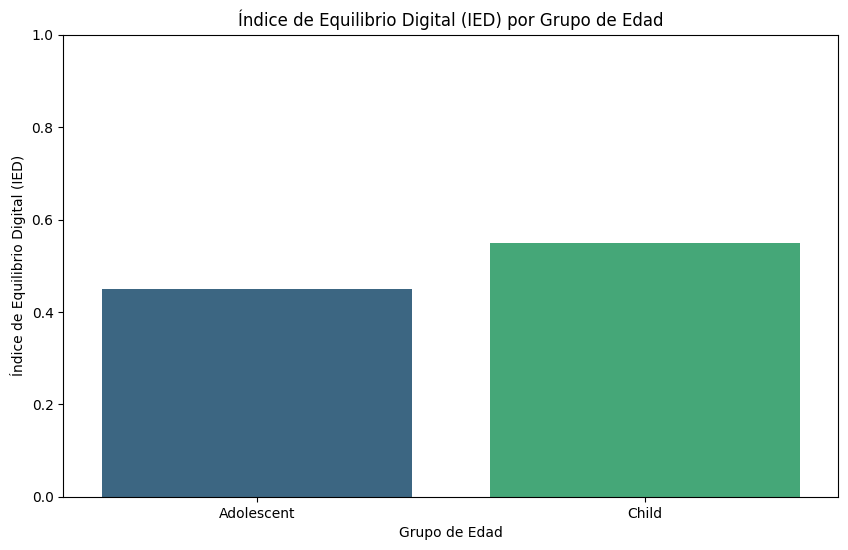

In [33]:
# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ied, x='Age_Group', y='IED', palette='viridis')
plt.title('Índice de Equilibrio Digital (IED) por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Índice de Equilibrio Digital (IED)')
plt.ylim(0, 1)
plt.show()